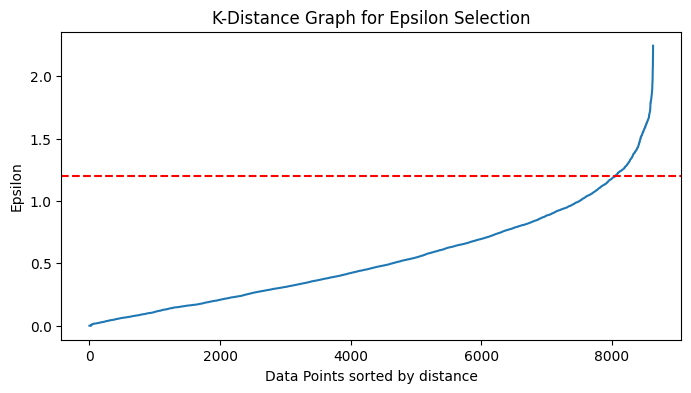

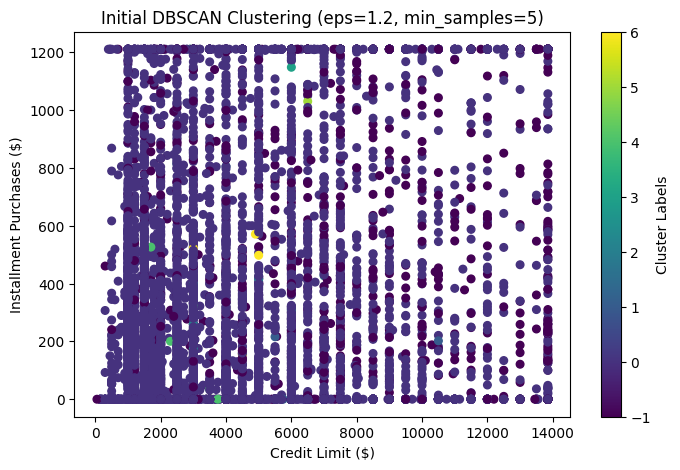

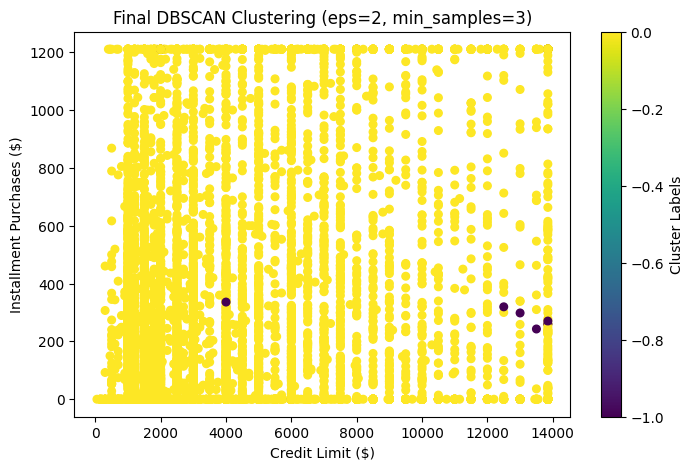

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# ==============================
# 1. LOAD AND PREPARE DATASET
# ==============================

# Load CSV file
df = pd.read_csv("ML470_S8_Customer_Data_Concept.csv")

# Select only numeric columns
df_num = df.select_dtypes(include=[np.number])

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# ==============================
# 2. K-DISTANCE GRAPH (eps SELECTION)
# ==============================

neighbors = NearestNeighbors(n_neighbors=3)
neighbors.fit(X_scaled)

distances, _ = neighbors.kneighbors(X_scaled)

# Extract 2nd nearest neighbor distances
k_distances = np.sort(distances[:, 1])

plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.axhline(y=1.2, color='red', linestyle='--')
plt.title("K-Distance Graph for Epsilon Selection")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon")
plt.show()

# ==============================
# 3. INITIAL DBSCAN CLUSTERING
# ==============================

dbscan_initial = DBSCAN(eps=1.2, min_samples=5)
labels_initial = dbscan_initial.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
scatter1 = plt.scatter(
    df["credit_limit"],
    df["installments_purchases"],
    c=labels_initial,
    cmap="viridis",
    s=30
)
plt.colorbar(scatter1, label="Cluster Labels")
plt.title("Initial DBSCAN Clustering (eps=1.2, min_samples=5)")
plt.xlabel("Credit Limit ($)")
plt.ylabel("Installment Purchases ($)")
plt.show()

# ==============================
# 4. FINAL DBSCAN CLUSTERING
# ==============================

dbscan_final = DBSCAN(eps=2, min_samples=3)
labels_final = dbscan_final.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
scatter2 = plt.scatter(
    df["credit_limit"],
    df["installments_purchases"],
    c=labels_final,
    cmap="viridis",
    s=30
)
plt.colorbar(scatter2, label="Cluster Labels")
plt.title("Final DBSCAN Clustering (eps=2, min_samples=3)")
plt.xlabel("Credit Limit ($)")
plt.ylabel("Installment Purchases ($)")
plt.show()
